# Analysis

Install connector postgres: pip install psycopg2

## IMPORT LIBRARIES

In [1]:
from connect import connect
import pandas as pd
from config import load_config
## Gestión de imagenes
import cv2
## Gestión de datos
import matplotlib.pyplot as plt
import seaborn as sns

## Config Database

In [2]:
query = 'SELECT * FROM players'

config = load_config()
conn = connect(config)

print(conn)

df = pd.read_sql(query, con=conn)
conn.close()

df.head()

Connected to the PostgreSQL server.
<connection object at 0x0000021E47FC48C0; dsn: 'user=postgres password=xxx dbname=project host=localhost port=5432', closed: 0>


C:\Users\Mario\AppData\Local\Temp\ipykernel_24488\1274760305.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, con=conn)


,id,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,43378,213027,https://sofifa.com/player/213027/matt-preston/...,M. Preston,Matt Preston,21,1995-03-16,185,78,England,...,54+1,56+1,56+1,56+1,54+1,56+1,60+1,60+1,60+1,56+1
1,43379,213224,https://sofifa.com/player/213224/phakamani-mng...,P. Mngadi,Phakamani Mngadi,21,1994-10-10,168,68,South Africa,...,48+1,45+1,45+1,45+1,48+1,46+1,39+1,39+1,39+1,46+1
2,43380,213889,https://sofifa.com/player/213889/ryan-haynes/1...,R. Haynes,Ryan Haynes,20,1995-09-27,184,68,England,...,61+1,57+1,57+1,57+1,61+1,60+1,56+1,56+1,56+1,60+1
3,43381,215301,https://sofifa.com/player/215301/lloyd-jones/1...,L. Jones,Lloyd Jones,20,1995-10-07,190,75,England,...,49+1,50+1,50+1,50+1,49+1,52+1,61+1,61+1,61+1,52+1
4,43382,218663,https://sofifa.com/player/218663/alejandro-rod...,Ale Pipo,Alejandro Rodríguez Marrero,21,1994-08-19,177,75,Spain,...,46+1,45+1,45+1,45+1,46+1,43+1,38+1,38+1,38+1,43+1


# Initialize Data Analysis

In [3]:
df.shape

(100995, 105)

Al inicializar el análisis nos damos cuenta que coincide el valor de datos del dataframe con el de la tabla en postgresql

In [4]:
# Revisar tipos de datos y datos faltantes
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100995 entries, 0 to 100994
Data columns (total 105 columns):
 #    Column                      Dtype  
---   ------                      -----  
 0    id                          int64  
 1    sofifa_id                   int64  
 2    player_url                  object 
 3    short_name                  object 
 4    long_name                   object 
 5    age                         int64  
 6    dob                         object 
 7    height_cm                   int64  
 8    weight_kg                   int64  
 9    nationality                 object 
 10   club                        object 
 11   overall                     int64  
 12   potential                   int64  
 13   value_eur                   int64  
 14   wage_eur                    int64  
 15   player_positions            object 
 16   preferred_foot              object 
 17   international_reputation    object 
 18   weak_foot                   int64  
 19   

Hay sobre todo valores de tipo object y de tipo int en este dataframe, aunque los últimos valores alternan entre enteros y rango de enteros, pero para poder importarlo en un principio se tomó como string.

In [5]:
df.isnull().sum()

id            0
sofifa_id     0
player_url    0
short_name    0
long_name     0
             ..
lb            0
lcb           0
cb            0
rcb           0
rb            0
Length: 105, dtype: int64

No está tomando los nulos, o postgresql no los regresa como nulos, al ser un varchar me imagino que los tomas como campos string sin contenido, por que los enteros parece que no hay nulos.

In [6]:
df['overall'].head()
df[df['overall'] > 93]

,id,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
3950,47356,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,32,1985-02-05,185,80,Portugal,...,66+3,62+3,62+3,62+3,66+3,62+3,53+3,53+3,53+3,62+3
21511,64948,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,33,1985-02-05,187,83,Portugal,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
21512,64949,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,31,1987-06-24,170,72,Argentina,...,63+2,61+2,61+2,61+2,63+2,58+2,47+2,47+2,47+2,58+2
39324,82718,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
73070,15466,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,28,1987-06-24,170,72,Argentina,...,62+3,57+3,57+3,57+3,62+3,57+3,44+3,44+3,44+3,57+3
87976,30347,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,31,1985-02-05,185,80,Portugal,...,66+3,61+3,61+3,61+3,66+3,62+3,53+3,53+3,53+3,62+3


El rango de overall termina en el 94

In [7]:
df['potential'].head()
df[df['potential'] > 94]

,id,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
21553,64989,231747,https://sofifa.com/player/231747/kylian-mbappe...,K. Mbappé,Kylian Mbappé,19,1998-12-20,178,73,France,...,65+3,62+3,62+3,62+3,65+3,62+3,53+3,53+3,53+3,62+3
39334,82728,231747,https://sofifa.com/player/231747/kylian-mbappe...,K. Mbappé,Kylian Mbappé,20,1998-12-20,178,73,France,...,66+3,62+3,62+3,62+3,66+3,63+3,54+3,54+3,54+3,63+3
57557,1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,27,1987-06-24,169,67,Argentina,...,62+3,62+3,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3
73070,15466,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,28,1987-06-24,170,72,Argentina,...,62+3,57+3,57+3,57+3,62+3,57+3,44+3,44+3,44+3,57+3
87978,30349,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar,Neymar da Silva Santos Junior,24,1992-02-05,174,68,Brazil,...,64+3,59+3,59+3,59+3,64+3,59+3,46+3,46+3,46+3,59+3


El rango de overall termina en el 95

In [8]:
df.duplicated().sum()

np.int64(0)

No hay valores duplicados, ya que por lo menos la edad del jugador cambia entre un año y otro.

In [9]:
df['short_name'].head()
df[df['short_name'] == "L. Messi"]

,id,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
3951,47357,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,30,1987-06-24,170,72,Argentina,...,62+3,59+3,59+3,59+3,62+3,58+3,46+3,46+3,46+3,58+3
21512,64949,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,31,1987-06-24,170,72,Argentina,...,63+2,61+2,61+2,61+2,63+2,58+2,47+2,47+2,47+2,58+2
39324,82718,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
57557,1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,27,1987-06-24,169,67,Argentina,...,62+3,62+3,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3
73070,15466,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,28,1987-06-24,170,72,Argentina,...,62+3,57+3,57+3,57+3,62+3,57+3,44+3,44+3,44+3,57+3
87977,30348,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,29,1987-06-24,170,72,Argentina,...,63+3,59+3,59+3,59+3,63+3,58+3,46+3,46+3,46+3,58+3


Logramos visualizar que existen hasta 6 registros de cada jugador

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,100995.0,5.049800e+04,2.915489e+04,1.0,25249.5,50498.0,75746.5,100995.0
sofifa_id,100995.0,2.054170e+05,3.504586e+04,2.0,190674.0,212230.0,228983.5,252905.0
age,100995.0,2.507212e+01,4.634504e+00,16.0,21.0,25.0,28.0,47.0
height_cm,100995.0,1.811978e+02,6.697101e+00,154.0,176.0,181.0,186.0,205.0
weight_kg,100995.0,7.535336e+01,6.975713e+00,49.0,70.0,75.0,80.0,110.0
overall,100995.0,6.581431e+01,7.104778e+00,40.0,61.0,66.0,70.0,94.0
potential,100995.0,7.072325e+01,6.321098e+00,40.0,66.0,70.0,75.0,95.0
value_eur,100995.0,1.890161e+06,4.820973e+06,0.0,140000.0,525000.0,1300000.0,123000000.0
wage_eur,100995.0,9.116689e+03,2.089729e+04,0.0,1000.0,2000.0,8000.0,565000.0
weak_foot,100995.0,2.941868e+00,6.587290e-01,1.0,3.0,3.0,3.0,5.0


## Un analisis exploratorio

### Potential Distribution

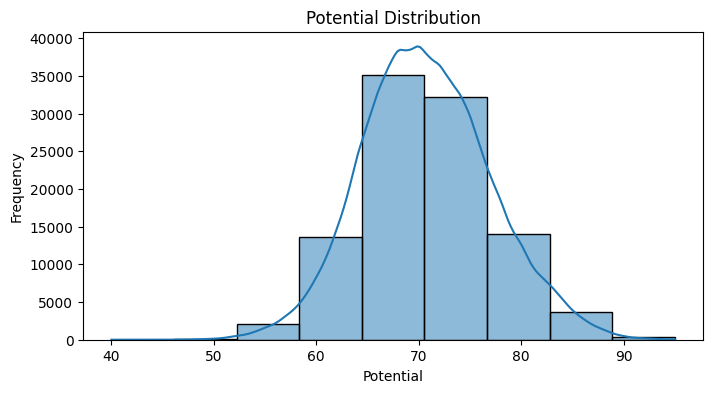

In [11]:
plt.figure(figsize=(8, 4))
sns.histplot(df["potential"], kde=True, bins=9)
plt.title("Potential Distribution")
plt.xlabel("Potential")
plt.ylabel("Frequency")
plt.show()

### Age Distribution

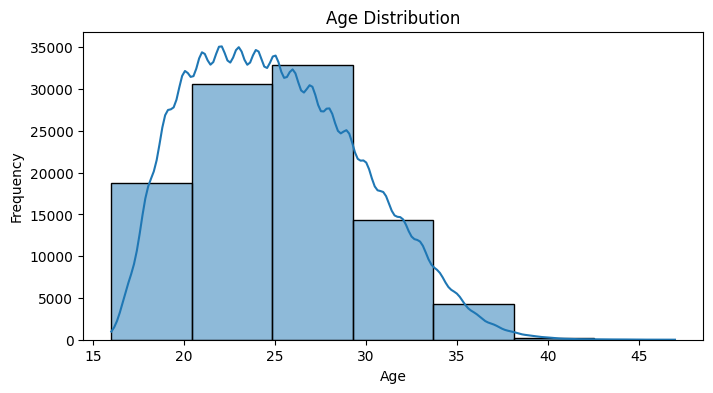

In [12]:
plt.figure(figsize=(8, 4))
sns.histplot(df["age"], kde=True, bins=7)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

### Height Distribution

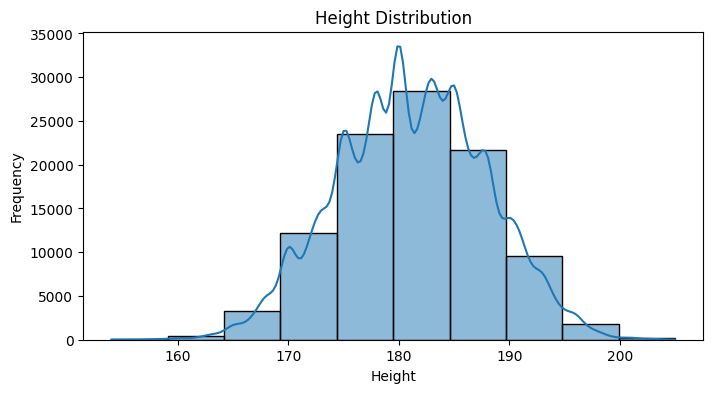

In [13]:
plt.figure(figsize=(8, 4))
sns.histplot(df["height_cm"], kde=True, bins=10)
plt.title("Height Distribution")
plt.xlabel("Height")
plt.ylabel("Frequency")
plt.show()

### Potential Distribution

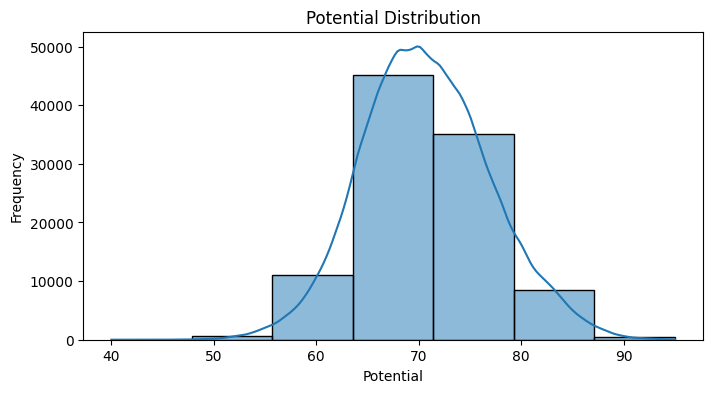

In [14]:
plt.figure(figsize=(8, 4))
sns.histplot(df["potential"], kde=True, bins=7)
plt.title("Potential Distribution")
plt.xlabel("Potential")
plt.ylabel("Frequency")
plt.show()

### Player Value Distribution

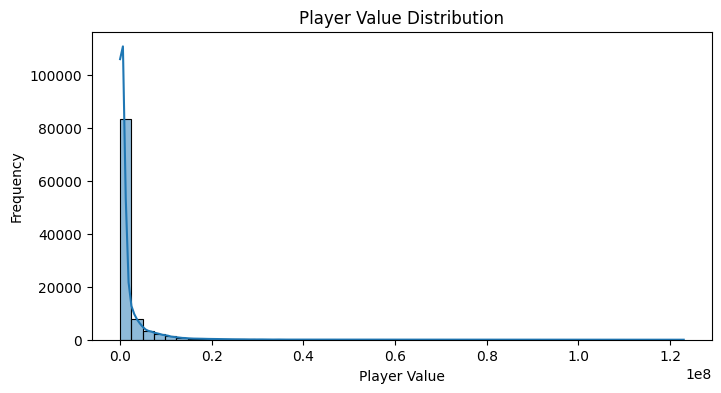

In [15]:
plt.figure(figsize=(8, 4))
sns.histplot(df["value_eur"], kde=True, bins=50)
plt.title("Player Value Distribution")
plt.xlabel("Player Value")
plt.ylabel("Frequency")
plt.show()

C:\Users\Mario\AppData\Local\Temp\ipykernel_24488\278616764.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='nationality', data=df[df['nationality'].isin(['Argentina','Portugal', 'Germany', 'Brazil', 'France'])], palette='coolwarm')


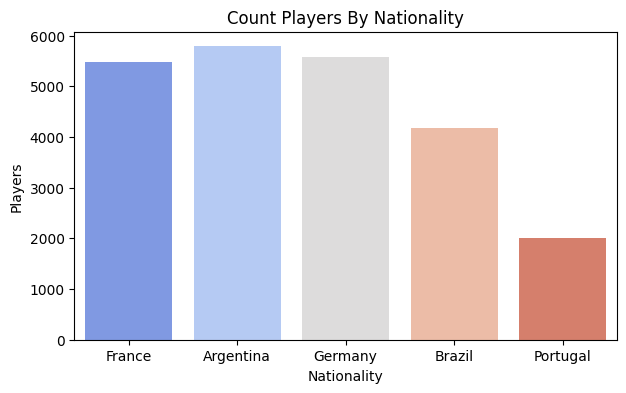

In [16]:
plt.figure(figsize=(7, 4))
sns.countplot(x='nationality', data=df[df['nationality'].isin(['Argentina','Portugal', 'Germany', 'Brazil', 'France'])], palette='coolwarm')
plt.title("Count Players By Nationality")
plt.xlabel("Nationality")
plt.ylabel("Players")
plt.show()

# Data Cleaning

In [17]:
print("Null Data")
print(df["joined"].isnull().sum())
print("\nDuplicated Data")
print(df.duplicated().sum())

Null Data
8038

Duplicated Data
0


In [18]:
df[df["gk_diving"].isnull()]["gk_diving"]

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
100990   NaN
100991   NaN
100992   NaN
100993   NaN
100994   NaN
Name: gk_diving, Length: 89748, dtype: float64

In [19]:
df['gk_diving'] = df['gk_diving'].fillna(0)
df[df["gk_diving"].isnull()]

,id,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb


In [20]:
df['nation_jersey_number'] = df['nation_jersey_number'].fillna(0)
df['pace'] = df['pace'].fillna(0)
df['shooting'] = df['shooting'].fillna(0)
df['passing'] = df['passing'].fillna(0)
df['dribbling'] = df['dribbling'].fillna(0)
df['defending'] = df['defending'].fillna(0)
df['physic'] = df['physic'].fillna(0)
df['gk_diving'] = df['gk_diving'].fillna(0)
df['gk_handling'] = df['gk_handling'].fillna(0)
df['gk_kicking'] = df['gk_kicking'].fillna(0)
df['gk_kicking'] = df['gk_kicking'].fillna(0)
df['gk_reflexes'] = df['gk_reflexes'].fillna(0)
df['gk_speed'] = df['gk_speed'].fillna(0)
df['gk_positioning'] = df['gk_positioning'].fillna(0)

Se verifica que todos los datos nulos que sean enteros que son parte de la estadistica de los jugadores se llene con 0.

In [21]:
print(df[df["dob"].isnull()]["dob"])
print(df[df["joined"].isnull()]["joined"])

Series([], Name: dob, dtype: object)
3         None
6         None
22        None
23        None
40        None
          ... 
100943    None
100968    None
100971    None
100972    None
100994    None
Name: joined, Length: 8038, dtype: object


In [22]:
df = df.drop('joined', axis=1)

Se elimina la columna joined ya que tiene muchos nulos, el eliminar toda esta data sería más contraproducente que eliminar la columna que no da mucha información importante, solo el año de ingreso de un jugador a su actual equipo, pero esto no aporta valor a los resultados que se quieren obtener

# Data Wrangling

In [29]:
dfClean = df

Crear función para obtener el año de la data y así saber estadisticas especificamente de cada año recolectado, se obtendrá del url que menciona el año que se hace referencia.

In [33]:
def getYearData(data):
  path = data.split("/")
  return int(path[len(path)-2])

Se aplica la función y se verifica que este devolviendo lo necesario

In [34]:
dataYear = dfClean['player_url'].apply(getYearData)
dataYear

0         17
1         17
2         17
3         17
4         17
          ..
100990    17
100991    17
100992    17
100993    17
100994    17
Name: player_url, Length: 100995, dtype: int64

Se crea una nueva variable con esta caracteristica.

In [35]:
dfClean['data_year'] = dataYear
dfClean['data_year']

0         17
1         17
2         17
3         17
4         17
          ..
100990    17
100991    17
100992    17
100993    17
100994    17
Name: data_year, Length: 100995, dtype: int64

Obtener el IMC a partir del peso y la estatura.

In [48]:
def getIMC(h, w):
  return (w / ((h/100) ** 2))

In [49]:
newIMC = list(map(getIMC, dfClean['height_cm'], dfClean['weight_kg']))
newIMC

[22.79035792549306,
 24.092970521541954,
 20.085066162570886,
 20.775623268698062,
 23.93948099205209,
 21.345272802998753,
 23.510204081632654,
 23.589835468362743,
 23.04002019946976,
 24.151672503320853,
 25.05930702662969,
 22.40817898532965,
 24.332277048438208,
 22.11584222166233,
 20.747550193111813,
 21.847008520333322,
 22.857142857142858,
 24.772096710265558,
 22.49134948096886,
 22.03840115928028,
 25.492722238973712,
 22.857142857142858,
 23.148148148148145,
 21.604938271604937,
 20.04744562130375,
 25.816630212628635,
 22.647376960519203,
 21.604938271604937,
 23.18339100346021,
 23.328993055555557,
 22.395413419331717,
 22.22222222222222,
 23.334120982986768,
 22.714681440443215,
 23.301094832264035,
 23.629489603024574,
 21.887076365377382,
 21.447567845806283,
 23.148148148148145,
 23.671253629592222,
 24.307243558580453,
 23.20054323223178,
 21.606648199445985,
 24.074074074074073,
 23.334120982986768,
 23.938989774631512,
 21.877551020408163,
 23.167430237401085,
 23.

In [50]:
dfClean["imc"] = newIMC
dfClean["imc"]

0         22.790358
1         24.092971
2         20.085066
3         20.775623
4         23.939481
            ...    
100990    21.222808
100991    24.453568
100992    23.148148
100993    22.790358
100994    23.374726
Name: imc, Length: 100995, dtype: float64

# Data Transformation

In [23]:
def getRangeMean(data):
  minusRange = data.split("-")
  addRange = data.split("+")
  if(len(minusRange) > 1) :
    return ((2*int(minusRange[0])) - int(minusRange[1]))/2
  elif(len(addRange) > 1) :
    return ((2*int(addRange[0])) + int(addRange[1]))/2
  elif(data=="") :
    return 0
  else:
    return int(data)

Se genera una función para hacer una media de las caracteristicas según posición y reflejos, ya que hay datos como 10+5, esto se asume a que se refiere a que esta entre 10 y 15, por lo que sirve más la media que sería 12.5

In [ ]:
dfClean['lb'] = dfClean['lb'].apply(getRangeMean)
dfClean['lb']

0         56.5
1         46.5
2         60.5
3         52.5
4         43.5
          ... 
100990    43.5
100991    68.5
100992    60.5
100993    54.5
100994    61.5
Name: lb, Length: 100995, dtype: float64

Se comprueba con lb que está funcionando la transformación, por lo cuál se procede a todos los demás.

In [25]:
dfClean['attacking_crossing'] = dfClean['attacking_crossing'].apply(getRangeMean)
dfClean['attacking_finishing'] = dfClean['attacking_finishing'].apply(getRangeMean)
dfClean['attacking_heading_accuracy'] = dfClean['attacking_heading_accuracy'].apply(getRangeMean)
dfClean['attacking_short_passing'] = dfClean['attacking_short_passing'].apply(getRangeMean)
dfClean['attacking_volleys'] = dfClean['attacking_volleys'].apply(getRangeMean)
dfClean['skill_dribbling'] = dfClean['skill_dribbling'].apply(getRangeMean)
dfClean['skill_curve'] = dfClean['skill_curve'].apply(getRangeMean)
dfClean['skill_fk_accuracy'] = dfClean['skill_fk_accuracy'].apply(getRangeMean)
dfClean['skill_long_passing'] = dfClean['skill_long_passing'].apply(getRangeMean)
dfClean['skill_ball_control'] = dfClean['skill_ball_control'].apply(getRangeMean)
dfClean['movement_acceleration'] = dfClean['movement_acceleration'].apply(getRangeMean)
dfClean['movement_sprint_speed'] = dfClean['movement_sprint_speed'].apply(getRangeMean)
dfClean['movement_agility'] = dfClean['movement_agility'].apply(getRangeMean)
dfClean['movement_reactions'] = dfClean['movement_reactions'].apply(getRangeMean)
dfClean['movement_balance'] = dfClean['movement_balance'].apply(getRangeMean)
dfClean['power_shot_power'] = dfClean['power_shot_power'].apply(getRangeMean)
dfClean['power_jumping'] = dfClean['power_jumping'].apply(getRangeMean)
dfClean['power_stamina'] = dfClean['power_stamina'].apply(getRangeMean)
dfClean['power_strength'] = dfClean['power_strength'].apply(getRangeMean)
dfClean['power_long_shots'] = dfClean['power_long_shots'].apply(getRangeMean)
dfClean['mentality_aggression'] = dfClean['mentality_aggression'].apply(getRangeMean)
dfClean['mentality_interceptions'] = dfClean['mentality_interceptions'].apply(getRangeMean)
dfClean['mentality_positioning'] = dfClean['mentality_positioning'].apply(getRangeMean)
dfClean['mentality_vision'] = dfClean['mentality_vision'].apply(getRangeMean)
dfClean['mentality_penalties'] = dfClean['mentality_penalties'].apply(getRangeMean)
dfClean['mentality_composure'] = dfClean['mentality_composure'].apply(getRangeMean)
dfClean['defending_marking'] = dfClean['defending_marking'].apply(getRangeMean)
dfClean['defending_standing_tackle'] = dfClean['defending_standing_tackle'].apply(getRangeMean)
dfClean['defending_sliding_tackle'] = dfClean['defending_sliding_tackle'].apply(getRangeMean)
dfClean['goalkeeping_diving'] = dfClean['goalkeeping_diving'].apply(getRangeMean)
dfClean['goalkeeping_handling'] = dfClean['goalkeeping_handling'].apply(getRangeMean)
dfClean['goalkeeping_kicking'] = dfClean['goalkeeping_kicking'].apply(getRangeMean)
dfClean['goalkeeping_positioning'] = dfClean['goalkeeping_positioning'].apply(getRangeMean)
dfClean['goalkeeping_reflexes'] = dfClean['goalkeeping_reflexes'].apply(getRangeMean)
dfClean['ls'] = dfClean['ls'].apply(getRangeMean)
dfClean['st'] = dfClean['st'].apply(getRangeMean)
dfClean['rs'] = dfClean['rs'].apply(getRangeMean)
dfClean['lw'] = dfClean['lw'].apply(getRangeMean)
dfClean['lf'] = dfClean['lf'].apply(getRangeMean)
dfClean['cf'] = dfClean['cf'].apply(getRangeMean)
dfClean['rf'] = dfClean['rf'].apply(getRangeMean)
dfClean['rw'] = dfClean['rw'].apply(getRangeMean)
dfClean['lam'] = dfClean['lam'].apply(getRangeMean)
dfClean['cam'] = dfClean['cam'].apply(getRangeMean)
dfClean['ram'] = dfClean['ram'].apply(getRangeMean)
dfClean['lm'] = dfClean['lm'].apply(getRangeMean)
dfClean['lcm'] = dfClean['lcm'].apply(getRangeMean)
dfClean['cm'] = dfClean['cm'].apply(getRangeMean)
dfClean['rcm'] = dfClean['rcm'].apply(getRangeMean)
dfClean['rm'] = dfClean['rm'].apply(getRangeMean)
dfClean['lwb'] = dfClean['lwb'].apply(getRangeMean)
dfClean['ldm'] = dfClean['ldm'].apply(getRangeMean)
dfClean['cdm'] = dfClean['cdm'].apply(getRangeMean)
dfClean['rdm'] = dfClean['rdm'].apply(getRangeMean)
dfClean['rwb'] = dfClean['rwb'].apply(getRangeMean)
dfClean['lcb'] = dfClean['lcb'].apply(getRangeMean)
dfClean['cb'] = dfClean['cb'].apply(getRangeMean)
dfClean['rcb'] = dfClean['rcb'].apply(getRangeMean)
dfClean['rb'] = dfClean['rb'].apply(getRangeMean)

In [27]:
dfClean[dfClean["rcb"].isnull()]

,id,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb


## Correlación

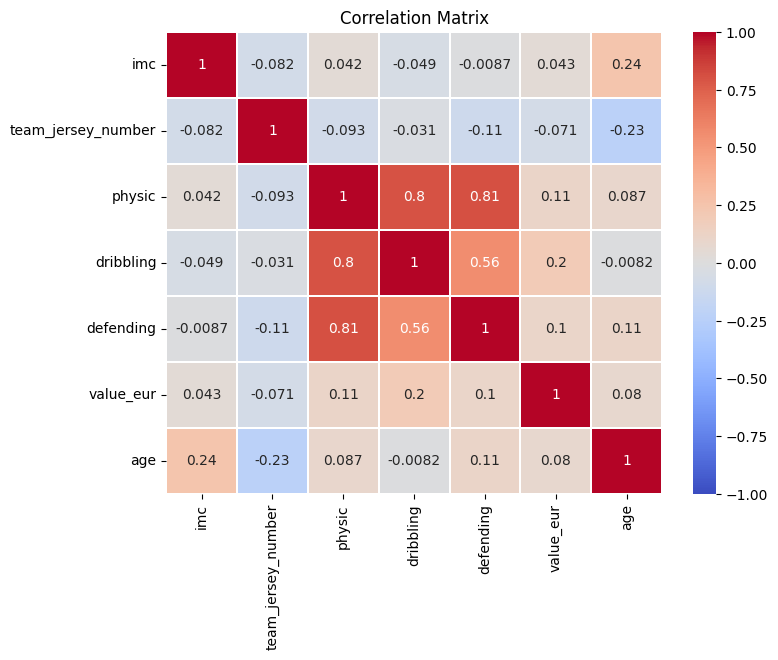

In [53]:
# Matriz de correlación
corr_matrix = dfClean[['imc', 'team_jersey_number', 'physic', 'dribbling', 'defending', 'value_eur', 'age']].corr()

# Trazar el mapa de calor de la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.2)
plt.title("Correlation Matrix")
plt.show()

Podemos ver que del IMC con el que tiene más relación es con la edad, tiene sentido, ya que la edad muchas veces afecta al peso.

También vemos algo interesante y es que el fisico está altamente relacionado con lo que es el dribleo y la defensa, mientras que la defensa y el dribleo también estan relacionados pero en menor medida.

Lo más interesante de esta tabla de correlación es la relación de valor en uros que con el que tiene mayor relación es con el dribleo, osea estrellas de ataque como Cristiano, Messi, y la edad como el fisico o defensa son casi la mitad de importantes que el dribleo.

In [74]:
dfNationality = dfClean[dfClean["nationality"].isin(["Brazil", "Argentina", "France", "Germany", "Spain", "Wales"])]

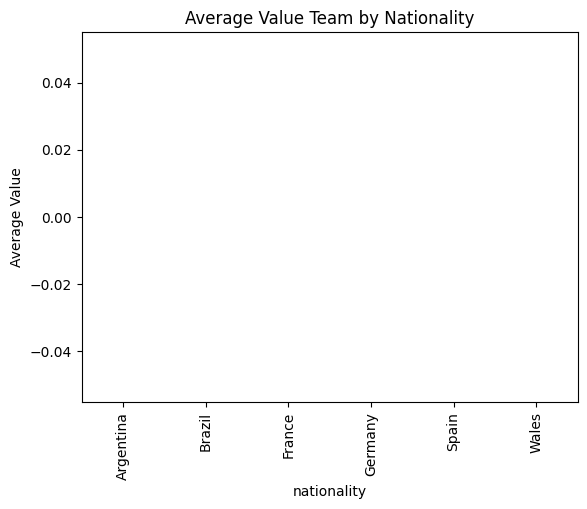

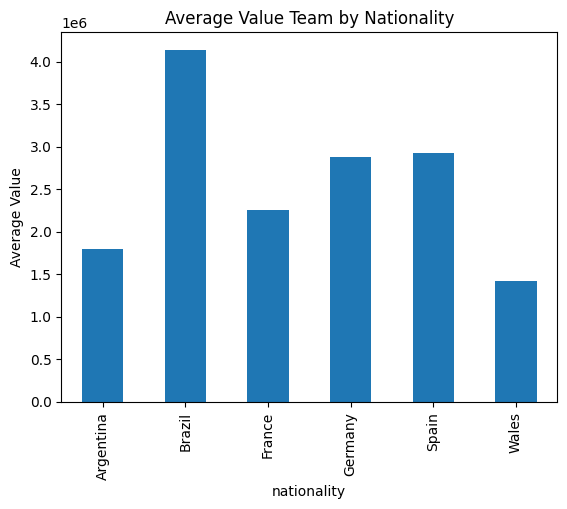

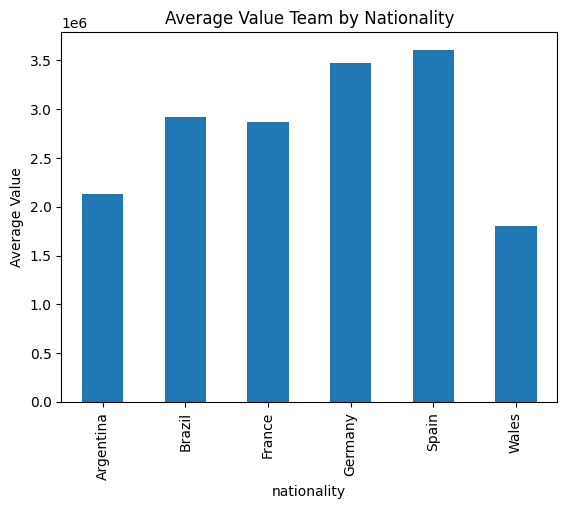

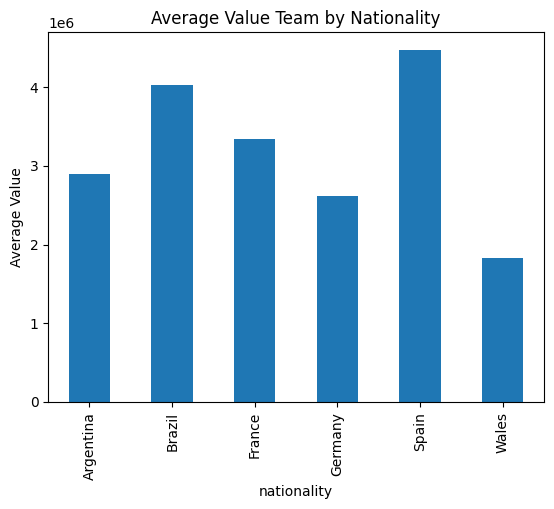

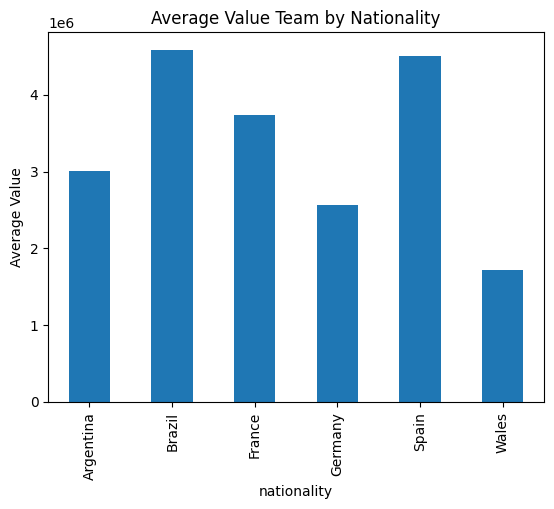

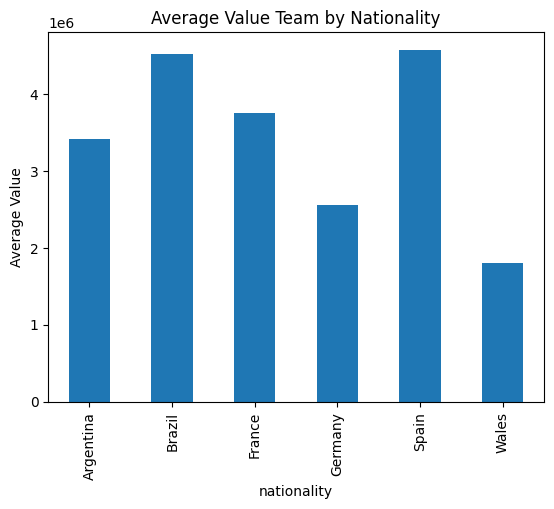

In [75]:
dfNationality[dfNationality["data_year"] == 15].groupby('nationality')['value_eur'].mean().plot(kind='bar', title='Average Value Team by Nationality', ylabel='Average Value')
plt.show()
dfNationality[dfNationality["data_year"] == 16].groupby('nationality')['value_eur'].mean().plot(kind='bar', title='Average Value Team by Nationality', ylabel='Average Value')
plt.show()
dfNationality[dfNationality["data_year"] == 17].groupby('nationality')['value_eur'].mean().plot(kind='bar', title='Average Value Team by Nationality', ylabel='Average Value')
plt.show()
dfNationality[dfNationality["data_year"] == 18].groupby('nationality')['value_eur'].mean().plot(kind='bar', title='Average Value Team by Nationality', ylabel='Average Value')
plt.show()
dfNationality[dfNationality["data_year"] == 19].groupby('nationality')['value_eur'].mean().plot(kind='bar', title='Average Value Team by Nationality', ylabel='Average Value')
plt.show()
dfNationality[dfNationality["data_year"] == 20].groupby('nationality')['value_eur'].mean().plot(kind='bar', title='Average Value Team by Nationality', ylabel='Average Value')
plt.show()

Con esto al escoger 5 potencias mundiales en el futbol y una que no lo es durante los años, se mira que de media el valor de un jugador de un equipo es mucho mayor en estas potencias, que en la nación que no es de las mejores. Por lo que el valor medio de cada nación puede determinar que tan buena es una selección, aunque no es concluyente, ya que Argentina la actual campeona, no es la que lidera la tabla.

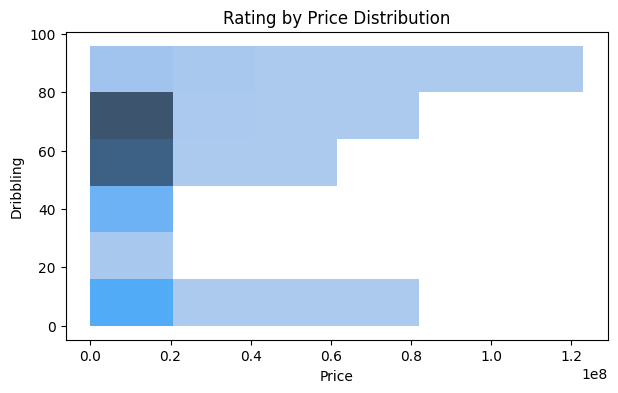

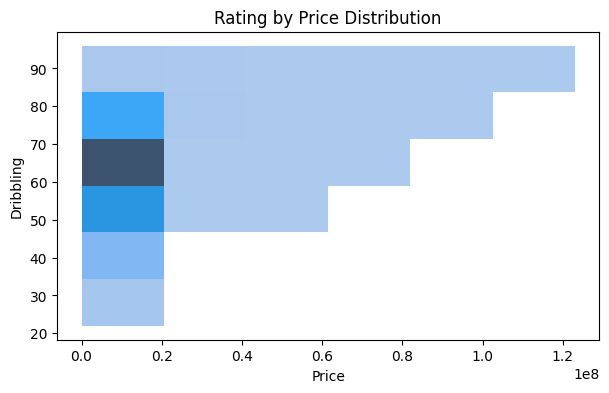

In [79]:
#contando porteros
plt.figure(figsize=(7, 4))
sns.histplot(x = dfClean["value_eur"], y= df['dribbling'], kde=True, bins=6)
plt.title("Rating by Price Distribution")
plt.xlabel("Price")
plt.ylabel("Dribbling")
plt.show()

# Solo jugadores de campo
dfPlayer = dfClean[dfClean["gk_diving"] == 0]
plt.figure(figsize=(7, 4))
sns.histplot(x = dfPlayer["value_eur"], y= df['dribbling'], kde=True, bins=6)
plt.title("Rating by Price Distribution")
plt.xlabel("Price")
plt.ylabel("Dribbling")
plt.show()

Aquí vemos algo demasiado interesante, y es que al contar porteros el valor de un jugador dependiendo de su dribbling se vuelve más escalonado, mientras más dribbling más vale, aunque hay una gran población de jugadores que no cobran demasiado y estan en la tabla media de dribbling. Vamos a hacer otra correlación, pero sin porteros.

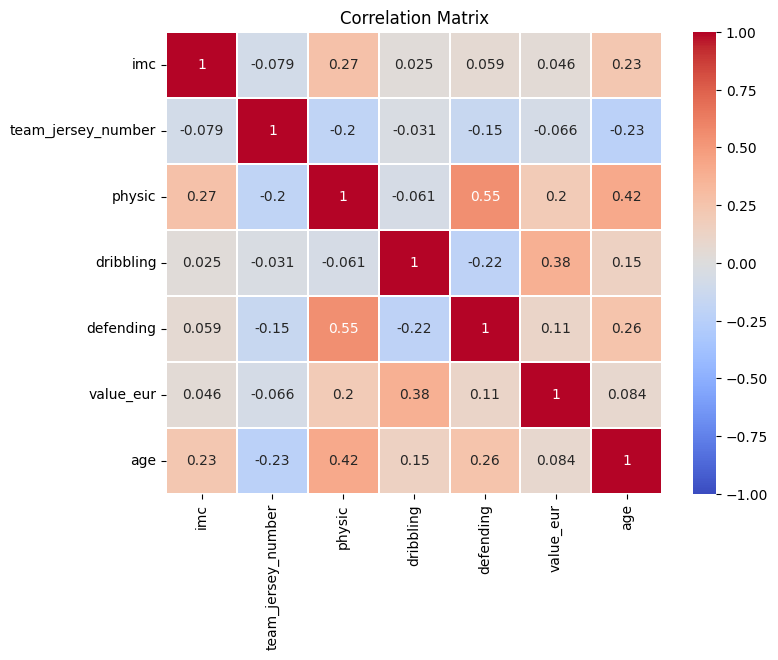

In [80]:
# Matriz de correlación
corr_matrix = dfPlayer[['imc', 'team_jersey_number', 'physic', 'dribbling', 'defending', 'value_eur', 'age']].corr()

# Trazar el mapa de calor de la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.2)
plt.title("Correlation Matrix")
plt.show()

Efectivamente crece demasiado comparado a la anterior matriz de correlación y es que los jugadores de campo mientras más valen es más probable que mejor dribbling tengan, otra que aumento corrleación es valor y fisico, y defensa casi no se vio alterada.

Esto solo demuestra como en el mundo del futbol, los delanteros son los que mayor valor tienen. Y las naciones con mayor valor son las que más brillan en el mundial.